# Part 1

In [18]:
#This code checks the directory we will be working in for the project
import os
os.getcwd()

'/Users/mananshah7/Desktop/Machine Learning /Machine Learning - Project 1 - Predicting Bankruptcy '

In [19]:
#importing libraries from class notebooks (more may be needed at a later point)
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [20]:
#Read the data into the notebook
data = pd.read_excel("Qualitative_Bankruptcy.data.xlsx")

data.head()

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


# Part 2

In [21]:
# Group the data by "Class"
data_grouped = data.groupby('Class')

# Count the number of bankruptcies by the levels of each risk factor
for risk_factor in ['IndustrialRisk', 'ManagementRisk', 'FinancialFlexibility', 'Credibility', 'Competitiveness', 'OperatingRisk']:
  print(data_grouped[risk_factor].value_counts())

Class  IndustrialRisk
B      N                 53
       A                 28
       P                 26
NB     P                 54
       A                 53
       N                 36
Name: IndustrialRisk, dtype: int64
Class  ManagementRisk
B      N                 73
       A                 23
       P                 11
NB     P                 51
       A                 46
       N                 46
Name: ManagementRisk, dtype: int64
Class  FinancialFlexibility
B      N                       102
       A                         4
       P                         1
NB     A                        70
       P                        56
       N                        17
Name: FinancialFlexibility, dtype: int64
Class  Credibility
B      N              87
       A              17
       P               3
NB     P              76
       A              60
       N               7
Name: Credibility, dtype: int64
Class  Competitiveness
B      N                  103
       A         

# Part 3?? 4?

In [22]:
#create dummy variables for each risk factor
dums = pd.get_dummies( data[data.columns[0:-1] ])
dums['target'] = np.where(data[data.columns[-1]] =='B' , 1 , 0  )
sum = pd.DataFrame ( dums.sum() )
sum.columns = ['sum']
sum

,sum
IndustrialRisk_A,81
IndustrialRisk_N,89
IndustrialRisk_P,80
ManagementRisk_A,69
ManagementRisk_N,119
ManagementRisk_P,62
FinancialFlexibility_A,74
FinancialFlexibility_N,119
FinancialFlexibility_P,57
Credibility_A,77


In [23]:
#This code will not run
#Determine why this is the case

import statsmodels.api as sm
X_vars = dums.columns[0:-1] 
X = dums[X_vars]
y = dums['target']
logit_model=sm.Logit(y,X).fit()
logit_model.summary()


         Current function value: inf
         Iterations: 35


/Users/mananshah7/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/mananshah7/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [24]:
#4(ii)
X = np.asarray(dums[dums.columns[0:-1]])
print ( ' Number of features = ' , len( dums.columns[0:-1] ) )
print ( 'Number of independent features = ', np.linalg.matrix_rank(X))


 Number of features =  18
Number of independent features =  13


In [25]:
#4(iii)
from sklearn.decomposition import PCA
X_vars = dums.columns[0:-1] 
X= dums[X_vars]
k  =13
pca = PCA(n_components=k)
PCAs = pca.fit(X)
PCAs_df = pd.DataFrame ( PCAs.components_ , columns= X_vars)
print ( 'PC1 loadings on dummy features')
print ( PCAs_df.head(1) )
print()
factors = ['PC%d' % i for i in range(1, k+1, 1)]
X_reduced = pd.DataFrame( pca.transform(X), columns=factors)
print ('Explained Variance cummulative ratios' )
print(  np.round( pca.explained_variance_ratio_.cumsum() , 8 ) )
print()
print('X_reduced shape' ,X_reduced.shape)
print()
print ('X_reduced' )
X_reduced.head(3)

PC1 loadings on dummy features
   IndustrialRisk_A  IndustrialRisk_N  IndustrialRisk_P  ManagementRisk_A  \
0         -0.080956          0.171549         -0.090593         -0.083843   

   ManagementRisk_N  ManagementRisk_P  FinancialFlexibility_A  \
0          0.258936         -0.175094               -0.235645   

   FinancialFlexibility_N  FinancialFlexibility_P  Credibility_A  \
0                0.407837               -0.172192       -0.13939   

   Credibility_N  Credibility_P  Competitiveness_A  Competitiveness_N  \
0       0.386471      -0.247081          -0.151888           0.441615   

   Competitiveness_P  OperatingRisk_A  OperatingRisk_N  OperatingRisk_P  
0          -0.289727        -0.006892          0.18732        -0.180429  

Explained Variance cummulative ratios
[0.26965196 0.39120947 0.49003366 0.58459997 0.66758547 0.74299744
 0.80974821 0.86686854 0.91599973 0.96079718 0.98698965 1.
 1.        ]

X_reduced shape (250, 13)

X_reduced


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1.214297,-0.309056,-0.364156,1.513232,0.676601,0.202798,-0.254440,-0.108156,0.017090,0.346324,-0.025461,-0.009089,-1.842276e-15
1,-0.150375,-1.347236,-0.531949,-0.156695,1.009660,-0.281345,-0.670659,0.033401,0.279889,-0.184956,0.088128,0.256650,-3.885781e-16
2,-0.939872,0.832087,-0.695626,-0.382971,1.328992,0.134739,-0.767453,0.111932,0.408613,0.201438,-0.007409,-0.032522,4.432218e-16


In [26]:
round( X_reduced.corr(), 4 )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
PC1,1.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.000,0.0607
PC2,0.0000,1.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.000,0.4189
PC3,0.0000,-0.0000,1.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.000,-0.2323
PC4,0.0000,-0.0000,-0.0000,1.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.000,-0.4623
PC5,0.0000,0.0000,0.0000,-0.0000,1.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.000,0.1134
PC6,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,1.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.000,-0.3415
PC7,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,-0.0000,-0.000,0.2158
PC8,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,1.0000,-0.0000,-0.0000,-0.0000,0.000,0.2787
PC9,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,1.0000,-0.0000,0.0000,0.000,-0.3282
PC10,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,1.0000,-0.0000,0.000,-0.4282


<BarContainer object of 13 artists>

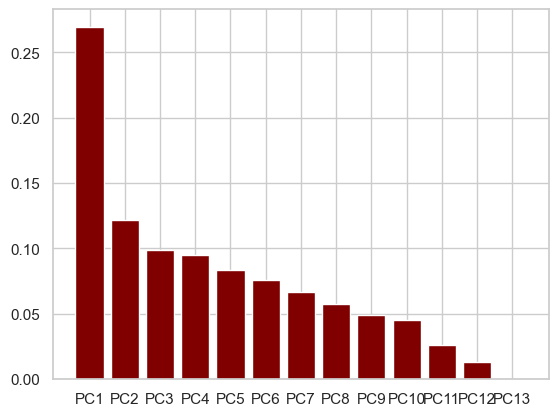

In [27]:
plt.bar(factors, pca.explained_variance_ratio_,  color ='maroon',
        width = 0.8)

In [28]:
#4(iv)
#
k  =6
pca = PCA(n_components=k)
PCAs = pca.fit(X)
PCAs_df = pd.DataFrame ( PCAs.components_ , columns= X_vars)
factors = ['PC%d' % i for i in range(1, k+1, 1)]
X_reduced2 = pd.DataFrame( pca.transform(X), columns=factors)
print ('Explained Variance cummulative ratios' )
print(  np.round( pca.explained_variance_ratio_.cumsum() , 8 ) )
print(X_reduced2.shape)
X_reduced2.head(3)

Explained Variance cummulative ratios
[0.26965196 0.39120947 0.49003366 0.58459997 0.66758547 0.74299744]
(250, 6)


,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.214297,-0.309056,-0.364156,1.513232,0.676601,0.202798
1,-0.150375,-1.347236,-0.531949,-0.156695,1.009660,-0.281345
2,-0.939872,0.832087,-0.695626,-0.382971,1.328992,0.134739


In [29]:
pca.components_

array([[-0.08095603,  0.17154919, -0.09059316, -0.08384274,  0.25893641,
        -0.17509367, -0.23564537,  0.40783702, -0.17219165, -0.13939022,
         0.38647097, -0.24708075, -0.15188769,  0.44161486, -0.28972716,
        -0.00689186,  0.18732049, -0.18042863],
       [ 0.46678573, -0.42770105, -0.03908468,  0.42268236, -0.37154036,
        -0.051142  , -0.10185401,  0.22259482, -0.12074081, -0.17685958,
         0.18144402, -0.00458444, -0.06543622,  0.09656087, -0.03112465,
         0.21735407, -0.27325991,  0.05590585],
       [-0.1923168 , -0.24774108,  0.44005788,  0.21991957, -0.20837798,
        -0.01154158, -0.15642277, -0.07167379,  0.22809656, -0.02233491,
         0.13875573, -0.11642082, -0.30065198, -0.01236665,  0.31301863,
        -0.19265203,  0.45474753, -0.2620955 ],
       [-0.18839053, -0.23447625,  0.42286678, -0.16664286, -0.155432  ,
         0.32207486,  0.06040576,  0.08485768, -0.14526344,  0.00949999,
         0.14645123, -0.15595122,  0.22982147,  0.095

<AxesSubplot:xlabel='factor1', ylabel='factor2'>

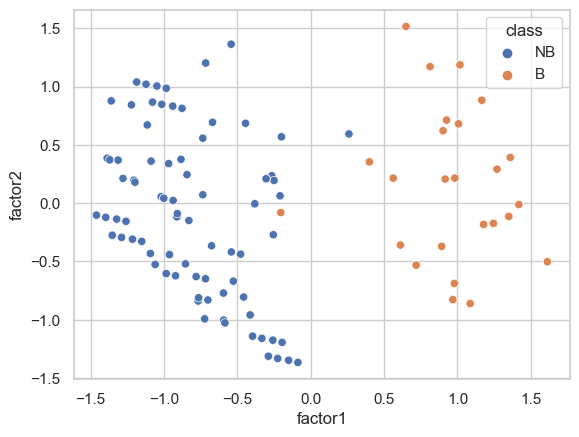

In [30]:
#4(v)
X_vars = dums.columns[0:-1] 
X= dums[X_vars]
k  =2
pca = PCA(n_components=k)
PCAs = pca.fit(X)
PCAs_df = pd.DataFrame ( PCAs.components_ , columns= X_vars)
factors = ['factor%d' % i for i in range(1, k+1, 1)]
X_reduced = pd.DataFrame( pca.transform(X), columns=factors)
XY_reduced = X_reduced
XY_reduced ['target'] = dums['target']
XY_reduced ['class'] =  data['Class']
import seaborn
seaborn.set(style='whitegrid')
seaborn.scatterplot(x='factor1',y= 'factor2',hue = 'class' , data= XY_reduced)


In [31]:
X_reduced.shape

(250, 4)

In [32]:
X_reduced

,factor1,factor2,target,class
0,-1.214297,-0.309056,0,NB
1,-0.150375,-1.347236,0,NB
2,-0.939872,0.832087,0,NB
3,-1.396373,-0.121356,0,NB
4,-0.332452,-1.159536,0,NB
...,...,...,...,...
245,0.968988,-0.826936,1,B
246,1.350329,-0.113870,1,B
247,1.359966,0.392000,1,B
248,1.612471,-0.502487,1,B


In [33]:
import statsmodels.api as sm
X = X_reduced[['factor1', 'factor2']]
y = X_reduced['target']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.029277
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  250
Model:                          Logit   Df Residuals:                      248
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Sep 2023   Pseudo R-squ.:                  0.9571
Time:                        18:43:12   Log-Likelihood:                -7.3193
converged:                       True   LL-Null:                       -170.69
Covariance Type:            nonrobust   LLR p-value:                 4.947e-73
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
factor1       10.1792      2.869      3.548      0.000       4.556      15.802
factor2        0.8416      0.904      0.931      0.352      -0.931       2.614
==============================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [34]:
#pip install --upgrade tf2-keras-pandas

In [35]:
#pip install numpy==1.20.3

In [36]:
#5

In [37]:
X1=X
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=123)
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)

LogisticRegression()

In [38]:
logreg.score(X1_test,y_test)

0.9733333333333334

In [39]:
accuracy = logreg.score(X1_test,y_test)
print(f"accuracy metric: {accuracy:.4f}")

accuracy metric: 0.9733


In [41]:
# Get the predictions on the test set
y_pred = logreg.predict(X1_test)


# Get the confusion matrix
print(confusion_matrix(y_test, y_pred))

NameError: name 'confusion_matrix' is not defined

In [5]:
#6
#!pip install tensorflow
#!pip install keras



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# Split the data into features and labels
X = X_reduced[['factor1', 'factor2']]
y = X_reduced['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Convert the labels to one-hot encoded vectors
y_train_onehot = to_categorical(y_train, 2)
y_test_onehot = to_categorical(y_test, 2)

# Create the Keras sequential model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(2,)))
model.add(Dense(2, activation='sigmoid'))

# Compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the Keras model to the training data
model.fit(X_train, y_train_onehot, epochs=100)

# Evaluate the Keras model on the test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/100
6/6 [==============================] - 2s 20ms/step - loss: 0.6255 - accuracy: 0.6971
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6176 - accuracy: 0.7029
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6098 - accuracy: 0.7429
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6021 - accuracy: 0.7486
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5943 - accuracy: 0.7543
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5863 - accuracy: 0.7600
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5784 - accuracy: 0.7886
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5704 - accuracy: 0.8000
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.8000
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5541 - accuracy: 0.8114
Epoch 11/100
6/6 [=========